# Data analysis

In [1]:
# import pandas, scipy, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Data Import

In [2]:
os = pd.read_csv('OSMI_Survey_Data.csv')

In [5]:
os.shape

(60186, 28)

In [6]:
os.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60186 entries, 0 to 60185
Data columns (total 28 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   index                                                                                       60186 non-null  int64  
 1   ResponseID                                                                                  60186 non-null  object 
 2   Are you selfemployed                                                                        60186 non-null  bool   
 3   How many employees does your company or organization have                                   48132 non-null  object 
 4   Is your employer primarily a tech companyorganization                                       48132 non-null  object 
 5   Is your primary role within your compan

In [3]:
# Rename columns to be more intuitive
os.columns = ['index', 'ResponseID', "Self_employed", "Size_company", "Tech_company", "TechIT_Job", "Previous_employer", "Family_hist", "Past_MentalHealth", "Current_MentalHealth", "Yes_Current_Conditions", "Maybe_Believed_Conditions", "Med_Prof_Diagnose", "Diagnosed_Conditions", "Sought_Treatment", "Age", "Gender", "Age_Group", "Country_live", "US_State/territory_live", "Country_work", "US_State/territory_work", "Work_description", "Remotely", "Question Group", "Speak_openly", "Question", "Response"]

In [4]:
# show the columns now
os.columns

Index(['index', 'ResponseID', 'Self_employed', 'Size_company', 'Tech_company',
       'TechIT_Job', 'Previous_employer', 'Family_hist', 'Past_MentalHealth',
       'Current_MentalHealth', 'Yes_Current_Conditions',
       'Maybe_Believed_Conditions', 'Med_Prof_Diagnose',
       'Diagnosed_Conditions', 'Sought_Treatment', 'Age', 'Gender',
       'Age_Group', 'Country_live', 'US_State/territory_live', 'Country_work',
       'US_State/territory_work', 'Work_description', 'Remotely',
       'Question Group', 'Speak_openly', 'Question', 'Response'],
      dtype='object')

In [9]:
# show the first 5 rows
os.head()

,index,ResponseID,Self_employed,Size_company,Tech_company,TechIT_Job,Previous_employer,Family_hist,Past_MentalHealth,Current_MentalHealth,...,Country_live,US_State/territory_live,Country_work,US_State/territory_work,Work_description,Remotely,Question Group,Speak_openly,Question,Response
0,0,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Does your employer provide mental health benef...,Not eligible for coverage / N/A
1,1,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Do you know the options for mental health care...,NaN
2,2,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Safe and supportive workplce for those with me...,No,Has your employer ever formally discussed ment...,No
3,3,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Does your employer offer resources to learn mo...,No
4,4,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Is your anonymity protected if you choose to t...,I don't know


## Caregorical data

In [10]:
# show first 5 rows of have you ever been diagnosed with a mental health disorder by a medical professional
os['Med_Prof_Diagnose'].head()

0    True
1    True
2    True
3    True
4    True
Name: Med_Prof_Diagnose, dtype: bool

- What are the two categories and the counts of these for medical professional diagnosis of a mental health disorder?

In [11]:
# What are the distinct values for have you been diagnosed with a mental health disorder by a medical professional
os['Med_Prof_Diagnose'].value_counts()

Med_Prof_Diagnose
False    30114
True     30072
Name: count, dtype: int64

- Here are the percetanges

In [12]:
# Calculate the proportions of the ones that have been diagnosed nd make percentages
os['Med_Prof_Diagnose'].value_counts(normalize=True) * 100

Med_Prof_Diagnose
False    50.034892
True     49.965108
Name: proportion, dtype: float64

- Look at the counts for tech company vs non tech

In [13]:
# Calculate frequency of tech company
os['Tech_company'].value_counts()

Tech_company
True     37086
False    11046
Name: count, dtype: int64

In [25]:
# calculate the percentage of tech company
os['Tech_company'].value_counts(normalize=True) * 100

Tech_company
True     77.050611
False    22.949389
Name: proportion, dtype: float64

- Now we will compare the counts of diagnosis related to whether or not they work for a tech company

In [14]:
# Make a neat table with tech company and diagnosis counts
pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose'])


Med_Prof_Diagnose,False,True
Tech_company,,
False,5460,5586
True,18858,18228


- Here is another comparison of two categorical variables: Country you work in and Mental Health diagnosis

In [15]:
# Calculate the frequency of each Coutnry you work in
os['Country_work'].value_counts()

Country_work
United States of America    35742
United Kingdom               7686
Canada                       3108
Germany                      2436
Netherlands                  1974
Australia                    1428
Sweden                        840
Ireland                       630
France                        588
Switzerland                   420
Brazil                        420
India                         378
Russia                        378
New Zealand                   378
Denmark                       294
Bulgaria                      294
Finland                       294
Belgium                       210
South Africa                  168
Poland                        168
Austria                       168
Czech Republic                126
Italy                         126
Chile                         126
Norway                        126
Romania                       126
Spain                         126
Other                          84
Bosnia and Herzegovina         84
A

In [39]:
# Compare the frequency of each country you work in with the frequency of tech company
pd.crosstab(os['Country_work'], os['Tech_company'])

Tech_company,False,True
Country_work,,
Afghanistan,0,42
Argentina,0,42
Australia,210,882
Austria,0,42
Bangladesh,0,42
Belgium,0,126
Bosnia and Herzegovina,42,42
Brazil,168,210
Bulgaria,0,252


- Here is a frequency table of mental health diagnosis in the different countries

In [40]:
# Compare the frequency of each country you work in with the frequency of mental health diagnosis
pd.crosstab(os['Country_work'], os['Med_Prof_Diagnose'])

Med_Prof_Diagnose,False,True
Country_work,,
Afghanistan,0,84
Argentina,42,0
Australia,462,966
Austria,42,126
Bangladesh,0,42
Belgium,126,84
Bosnia and Herzegovina,84,0
Brazil,252,168
Brunei,42,0


- This table also lists the countries and the diagnosis but limits it to only participants who work at tech companies

In [41]:
# Add onto the previous table a limiting factor that they must work in a tech company
pd.crosstab(os['Country_work'], os['Med_Prof_Diagnose'], values=os['Tech_company'], aggfunc='sum')

Med_Prof_Diagnose,False,True
Country_work,,
Afghanistan,NaN,42
Argentina,42,NaN
Australia,294,588
Austria,0,42
Bangladesh,NaN,42
Belgium,84,42
Bosnia and Herzegovina,42,NaN
Brazil,168,42
Brunei,0,NaN


## Comparative numerical analysis

- First, here are some statistics on age

In [35]:
# Give age statistics
os['Age'].describe()

count    60102.000000
mean        34.106219
std          8.283055
min         15.000000
25%         28.000000
50%         33.000000
75%         39.000000
max         99.000000
Name: Age, dtype: float64

- Next we will compare age and professional mental health diagnosis

In [36]:
# Calculate the mean age for each category of mental health diagnosis
os.groupby('Med_Prof_Diagnose')['Age'].mean()

Med_Prof_Diagnose
False    33.537709
True     34.675524
Name: Age, dtype: float64

- Looks to be about the same maybe they are not associated

## Numerical data analysis

- Since my dataset only has one numerical column I cannot compare two of them

## Data Visualization

In [31]:
# this is code to tell the computer to display things in high resolution since the base is low resolution
%config InlineBackend.figure_format = 'retina'
#create plots on white background and add grid if appropriate
sns.set_style('whitegrid')

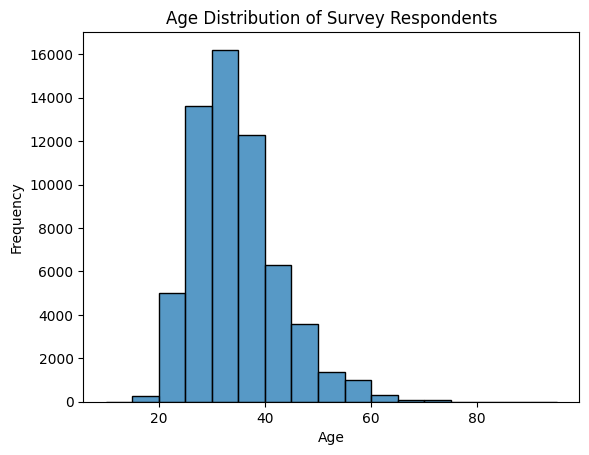

In [23]:
# create a plot of the age column using sns
sns.histplot(os['Age'], bins=range(10,100,5));
# add a title
plt.title('Age Distribution of Survey Respondents')
# add x and y labels
plt.xlabel('Age')
plt.ylabel('Frequency');

- Here is a histogram of the age distribution across both those with a medical professional diagonsis of a mental health disorder and those without one

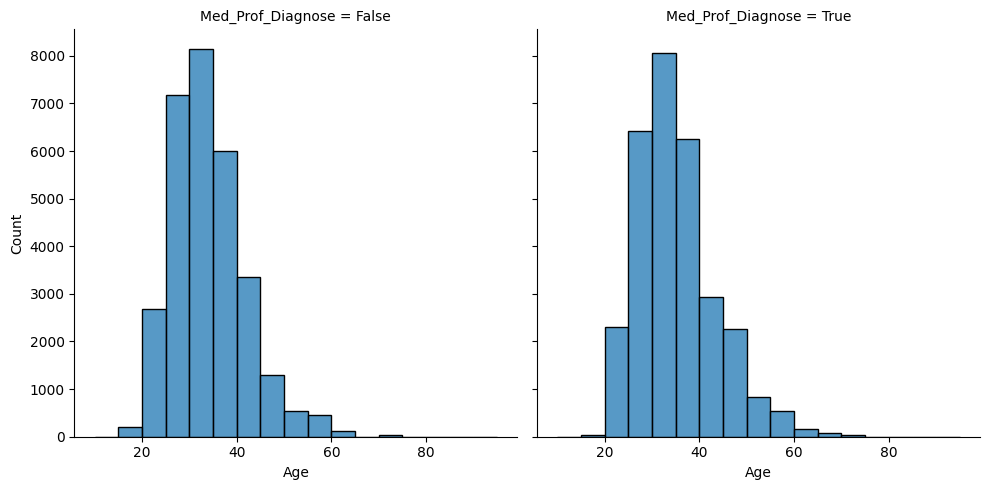

In [27]:
# create a histogram of age by category of mental health diagnosis using displot and col argument
sns.displot(data=os, x='Age', col='Med_Prof_Diagnose', bins=range(10,100,5));
# add x and y labels to both plots
plt.xlabel('Age')
plt.ylabel('Frequency');

- The following visualization is to show the frequency of those with or without a mental health diagnosis by a professional and whether or not they worked at a tech company. Just based on this visual it s like there is a pretty even split, but further statistical analysis is needed.

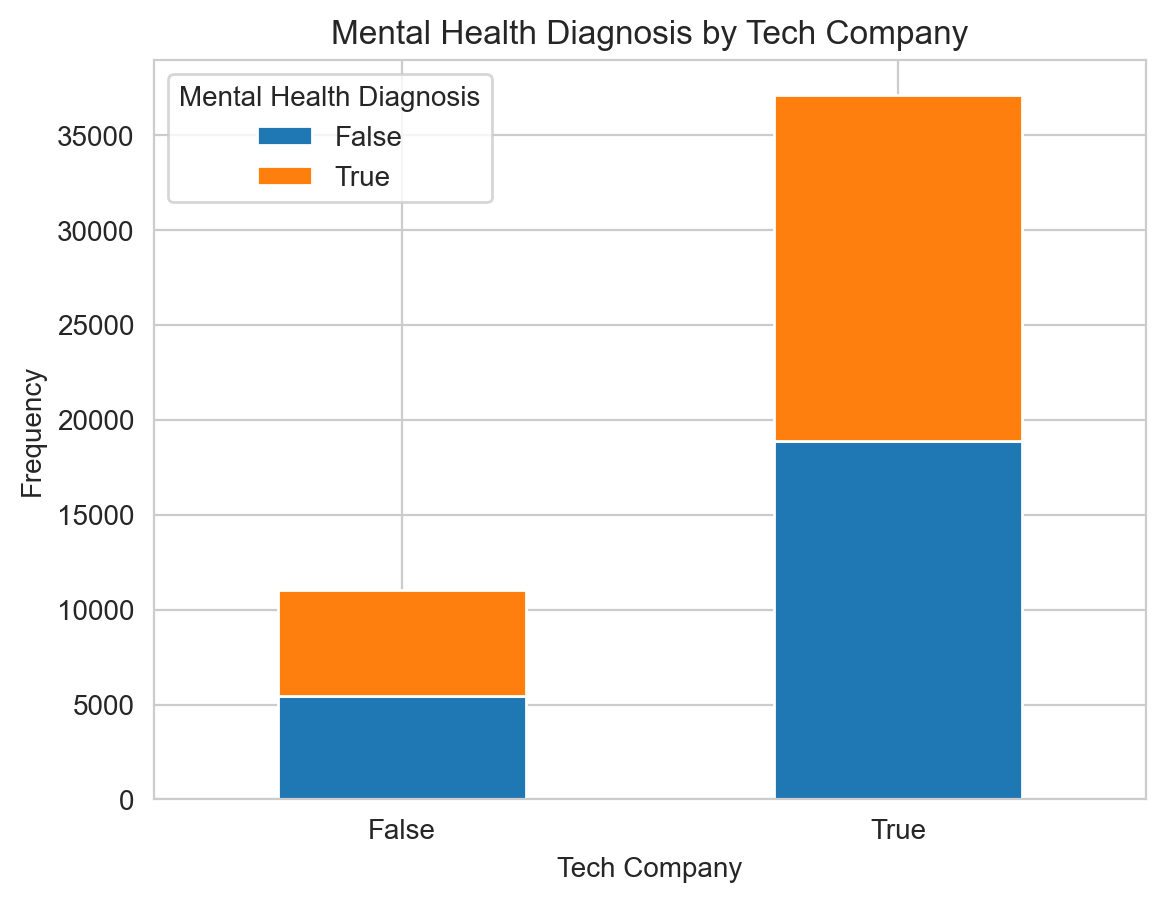

In [34]:
# create a heatmap of the correlation between top tech companies and mental health diagnosis
pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose']).plot(kind='bar', stacked=True)
plt.title('Mental Health Diagnosis by Tech Company')
plt.ylabel('Frequency')
plt.xlabel('Tech Company')
plt.xticks(rotation=0)
plt.legend(title='Mental Health Diagnosis');

- This distribution is just to show the proportion of tech companies to non-tech companies in the countries

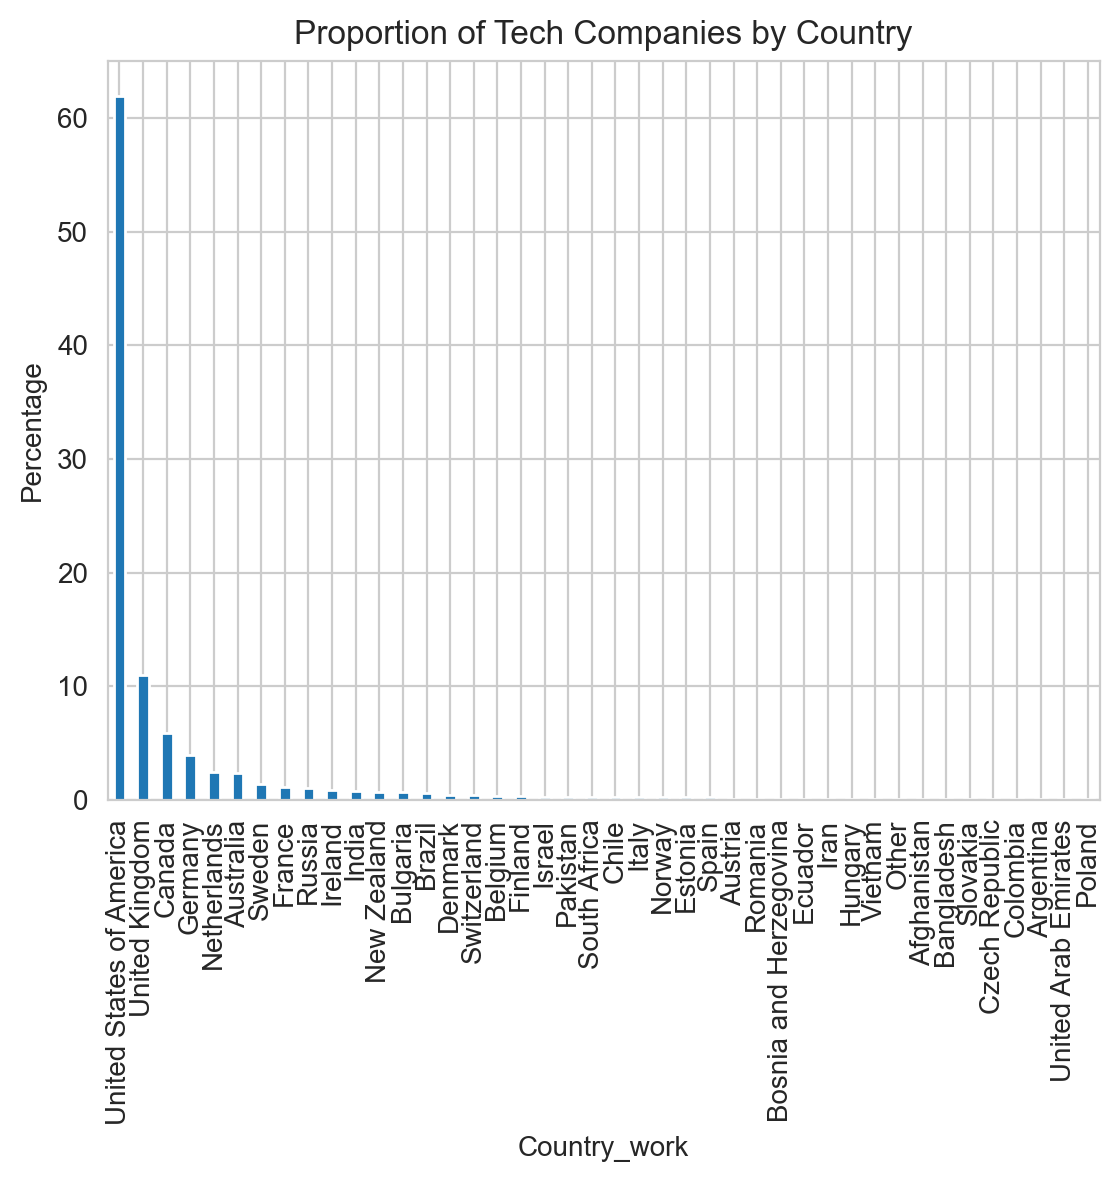

In [47]:
# Create a bar plot of the countries with the highest proportion of tech companies
tech_company_proportions.plot(kind='bar')
plt.title('Proportion of Tech Companies by Country')
plt.ylabel('Percentage');

- While not directly related to the tech aspect, this image gives valuable information into whether or not a family history of mental illness plays a role.

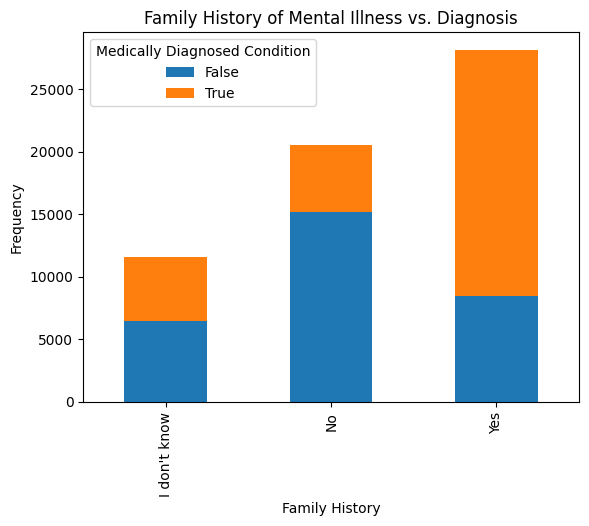

In [37]:
# Group the data by 'Family_hist' and 'Diagnosed' and calculate counts
stacked_data = os.groupby(['Family_hist', 'Med_Prof_Diagnose']).size().unstack()

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True)

# Add titles and labels
plt.title('Family History of Mental Illness vs. Diagnosis')
plt.ylabel('Frequency')
plt.xlabel('Family History')
plt.legend(title='Medically Diagnosed Condition', loc='upper left');

### This was a little interesting and slightly predictable knowing how mental illness often runs in families.

- This next visual is a little interesting because it is looking at if mental health disorders are more prevalent in larger or smaller companies.

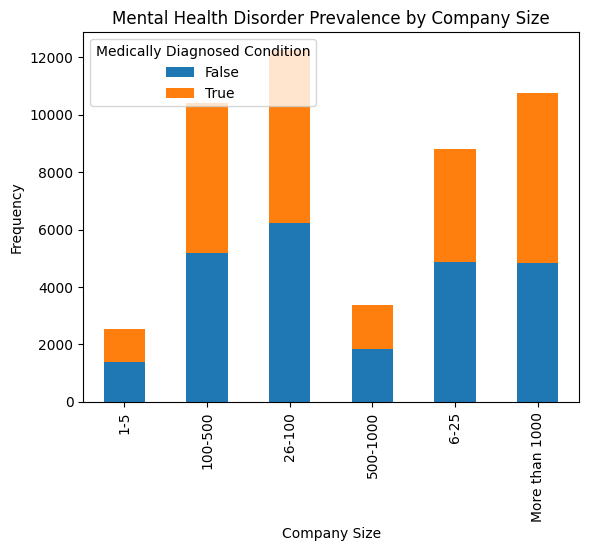

In [60]:
# make a Bar chart of mental health disorder prevalence by company size
company_size_counts = os.groupby(['Size_company', 'Med_Prof_Diagnose']).size().unstack()
company_size_counts.plot(kind='bar', stacked=True)
# Add titles and labels
plt.title('Mental Health Disorder Prevalence by Company Size')
plt.ylabel('Frequency')
plt.xlabel('Company Size')
plt.legend(title='Medically Diagnosed Condition', loc='upper left');

### We can see this did not show us much about if company size influences mental health diagnosis.
- cannot figure out how to get the bars to order correctly will keep working on it

- Here is a word cloud consisting of the most popular words from the diagnosed conditions column.

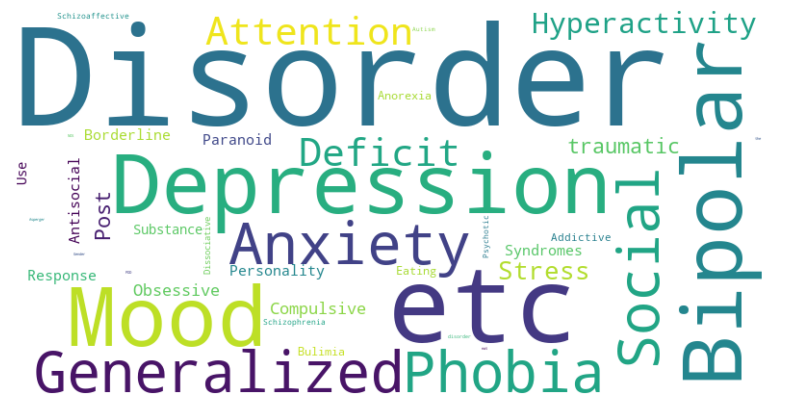

In [66]:
# create Word cloud of common mental health conditions mentioned.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
# Create a single string of all the diagnosed conditions
diagnosed_conditions = ' '.join(os['Diagnosed_Conditions'].dropna())
# Use regex to find all words in the string
words = re.findall(r'\w+', diagnosed_conditions)
# Count the frequency of each word
word_counts = Counter(words)
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Thought this was cool.

- This chart is concerning whether or not a tech role at the company affects the proportion of mental illness.

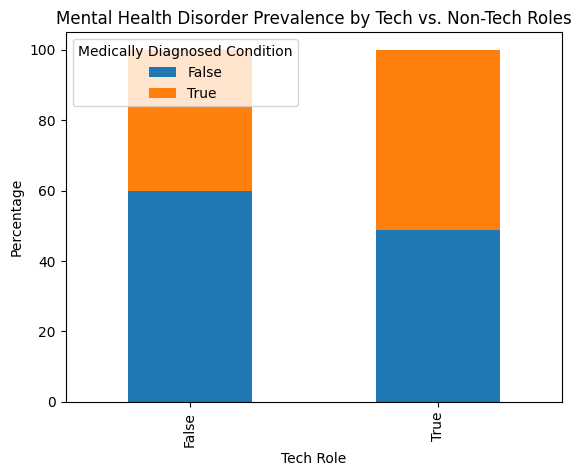

In [69]:
# create bar chart of tech vs. non-tech roles and mental health disorder percentages.
# Create a DataFrame to hold the percentages
tech_non_tech_counts = os.groupby(['TechIT_Job', 'Med_Prof_Diagnose']).size().unstack()
# Calculate the percentages
tech_non_tech_percentages = tech_non_tech_counts.div(tech_non_tech_counts.sum(axis=1), axis=0) * 100
# Plot the percentages
tech_non_tech_percentages.plot(kind='bar', stacked=True)
# Add titles and labels
plt.title('Mental Health Disorder Prevalence by Tech vs. Non-Tech Roles')
plt.ylabel('Percentage')
plt.xlabel('Tech Role')
plt.legend(title='Medically Diagnosed Condition', loc='upper left');


# Checking statistically how mental health diagnosis is affected by different factors.

In [6]:
# run a chi-squared test to see if there is a significant difference in mental health diagnosis between those who work in tech companies and those who do not
# Create a contingency table
contingency_table = pd.crosstab(os['Tech_company'], os['Med_Prof_Diagnose'])
# Perform the chi-squared test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# Print the results
print(f'Chi-squared statistic: {chi2_stat}, P-value: {p_value}, Degrees of freedom: {dof}')
# Interpret the results
if p_value < 0.05:
    print('There is a significant difference in mental health diagnosis between those who work in tech companies and those who do not.')
else:
    print('There is no significant difference in mental health diagnosis between those who work in tech companies and those who do not.')

Chi-squared statistic: 6.80600217522222, P-value: 0.009085194696035621, Degrees of freedom: 1
There is a significant difference in mental health diagnosis between those who work in tech companies and those who do not.


In [7]:
# run a test to see if there is a significance in mental health diagnosis and different company sizes
# Create a contingency table
contingency_table_size = pd.crosstab(os['Size_company'], os['Med_Prof_Diagnose'])
# Perform the chi-squared test
chi2_stat_size, p_value_size, dof_size, expected_size = stats.chi2_contingency(contingency_table_size)
# Print the results
print(f'Chi-squared statistic: {chi2_stat_size}, P-value: {p_value_size}, Degrees of freedom: {dof_size}')
# Interpret the results
if p_value_size < 0.05:
    print('There is a significant difference in mental health diagnosis between different company sizes.')
else:
    print('There is no significant difference in mental health diagnosis between different company sizes.')

Chi-squared statistic: 264.2365248158145, P-value: 4.83612041400545e-55, Degrees of freedom: 5
There is a significant difference in mental health diagnosis between different company sizes.


In [17]:
# Find top 5 countries with the highest percentage of tech companies and mental health diagnosis
tech_company_counts = os['Country_work'].value_counts(normalize=True) * 100
tech_company_counts = tech_company_counts[tech_company_counts > 0]
tech_company_counts = tech_company_counts.reset_index()
tech_company_counts.columns = ['Country', 'Percentage']
# Find the top 5 countries with the highest percentage of tech companies
top_5_tech_countries = tech_company_counts.nlargest(5, 'Percentage')
# Print these findings
print('Top 5 countries with the highest percentage of tech companies:')
print(top_5_tech_countries)



Top 5 countries with the highest percentage of tech companies:
                    Country  Percentage
0  United States of America   59.385904
1            United Kingdom   12.770412
2                    Canada    5.163992
3                   Germany    4.047453
4               Netherlands    3.279833
